<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/CNN_for_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for diagnosis


**Agenda**
* Application of CNN in medical diagnosis.
* Pneumonia Detection using CNN.
* Brain tumor Detection using CNN.

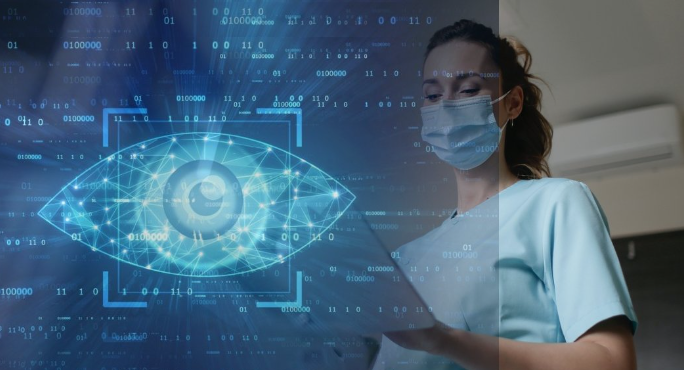

CNNs have contributed significantly in the areas of image understanding. CNN-based approaches are placed in the leader board of the many image understanding challenges, such as Medical Image Computing and Computer Assisted Intervention (MICCAI) biomedical challenge, Brain Tumor segmentation (BRATS) Multimodal Brain Tumor Segmentation challenge , Imagenet classification challenge, challenges of International Conference on Pattern Recognition (ICPR) and Ischemic Stroke Lesion Segmentation (ISLES) challenge. CNN has become a powerful choice as a technique for medical image understanding. Researchers have successfully applied CNNs for many medical image understanding applications like detection of tumors and their classification into benign and malignant, detection of skin lesions, detection of optical coherence tomography images, detection of colon cancer, blood cancer, anomalies of the heart, breast, chest, eye etc. Also CNN-based models like CheXNet, used for classifying 14 different ailments of the chest achieved better results compared to the average performance of human experts.In this note book we will work on few real-life deep learning models for diagnosis.



## Applicaation of CNN in medical diagnosis

* **Medical Imaging Analysis:** CNNs are extensively used in the analysis of medical images such as X-rays, CT scans, MRI scans, and histopathology slides. They can assist in detecting and diagnosing various conditions including tumors, fractures, abnormalities in organs, and signs of diseases like cancer, Alzheimer's, or multiple sclerosis.
* **Radiology:** CNNs can be trained to identify specific patterns or anomalies in radiological images, aiding radiologists in interpretation. For instance, CNNs have been employed to detect pulmonary nodules in chest CT scans, fractures in X-rays, and signs of stroke in brain imaging.
* **Pathology:** In histopathology, CNNs are used for tasks like tumor detection, classification of cancer subtypes, and grading of tumors. By analyzing microscopic images of tissue samples, CNNs can provide valuable insights into diseases like cancer, aiding in diagnosis and treatment planning.
* **Dermatology:** CNNs have been applied to dermatological images for diagnosing skin conditions such as melanoma, psoriasis, and eczema. They can assist dermatologists by automatically identifying skin lesions, tracking changes over time, and providing early detection of skin cancer.
* **Ophthalmology:** CNNs are used in the analysis of retinal images for diagnosing eye diseases like diabetic retinopathy, age-related macular degeneration, and glaucoma. They can detect abnormalities such as hemorrhages, exudates, and microaneurysms, helping ophthalmologists in early intervention and prevention of vision loss.
* **Neuroimaging:** CNNs are applied to neuroimaging data from techniques like MRI and fMRI for diagnosing neurological disorders such as Alzheimer's disease, Parkinson's disease, and multiple sclerosis. They can detect structural changes in the brain, identify biomarkers, and predict disease progression.
* **Cardiology:** CNNs are utilized in analyzing cardiac images from techniques like echocardiography and cardiac MRI. They assist in diagnosing heart conditions such as myocardial infarction, cardiomyopathy, and congenital heart defects by detecting abnormalities in heart structure and function.
* **Endoscopy:** CNNs are employed in analyzing endoscopic images and videos for detecting gastrointestinal diseases such as colorectal cancer, gastric ulcers, and inflammatory bowel disease. They aid gastroenterologists by identifying lesions, polyps, and areas of inflammation.

# What is Pneumonia?

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia. Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.



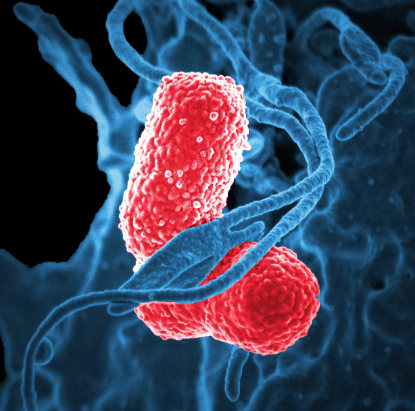

## Symptoms

* Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath

## Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Extraction of zip file using python

In [ ]:
import zipfile
zip_file_path = '/content/drive/MyDrive/dataset/archive (17).zip'

# Define the directory to extract the files to
extract_to_directory = "/content/drive/MyDrive/path/to/extracted/files"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

## Importing the necessary libraries

In [ ]:
import os
import random
import itertools
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def generate_dataset(path):
    data = {'imgpath': [], 'labels': []}

    folders = os.listdir(path)

    for folder in folders:
        folderpath = os.path.join(path, folder)
        files = os.listdir(folderpath)

        for file in files:
            filepath = os.path.join(folderpath, file)

            data['imgpath'].append(filepath)
            data['labels'].append(folder)

    return pd.DataFrame(data)
def set_seed(SEED):
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    random.seed(SEED)

## Organizing the Images

In [ ]:
train_path = '/content/drive/MyDrive/path/to/extracted/files/chest_xray/train'
val_path = '/content/drive/MyDrive/path/to/extracted/files/chest_xray/val'
test_path ='/content/drive/MyDrive/path/to/extracted/files/chest_xray/test'

train_df = generate_dataset(train_path).sample(frac = 1, random_state = 0).reset_index(drop = True)
val_df = generate_dataset(val_path).sample(frac = 1, random_state = 0).reset_index(drop = True)
test_df = generate_dataset(test_path).sample(frac = 1, random_state = 0).reset_index(drop = True)

print(f'\nTraining Dataframe of shape {train_df.shape}: \n{train_df.head()}')
print(f'\nValidation Dataframe of shape {val_df.shape}: \n{val_df.head()}')
print(f'\nTesting Dataframe of shape {test_df.shape}: \n{test_df.head()}')


Training Dataframe of shape (5216, 2): 
                                             imgpath     labels
0  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
1  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
2  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
3  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
4  /content/drive/MyDrive/path/to/extracted/files...     NORMAL

Validation Dataframe of shape (16, 2): 
                                             imgpath     labels
0  /content/drive/MyDrive/path/to/extracted/files...     NORMAL
1  /content/drive/MyDrive/path/to/extracted/files...     NORMAL
2  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
3  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA
4  /content/drive/MyDrive/path/to/extracted/files...  PNEUMONIA

Testing Dataframe of shape (624, 2): 
                                             imgpath     labels
0  /content/drive/MyDrive/path/to/extracted/fil

## Visualizing Random Images

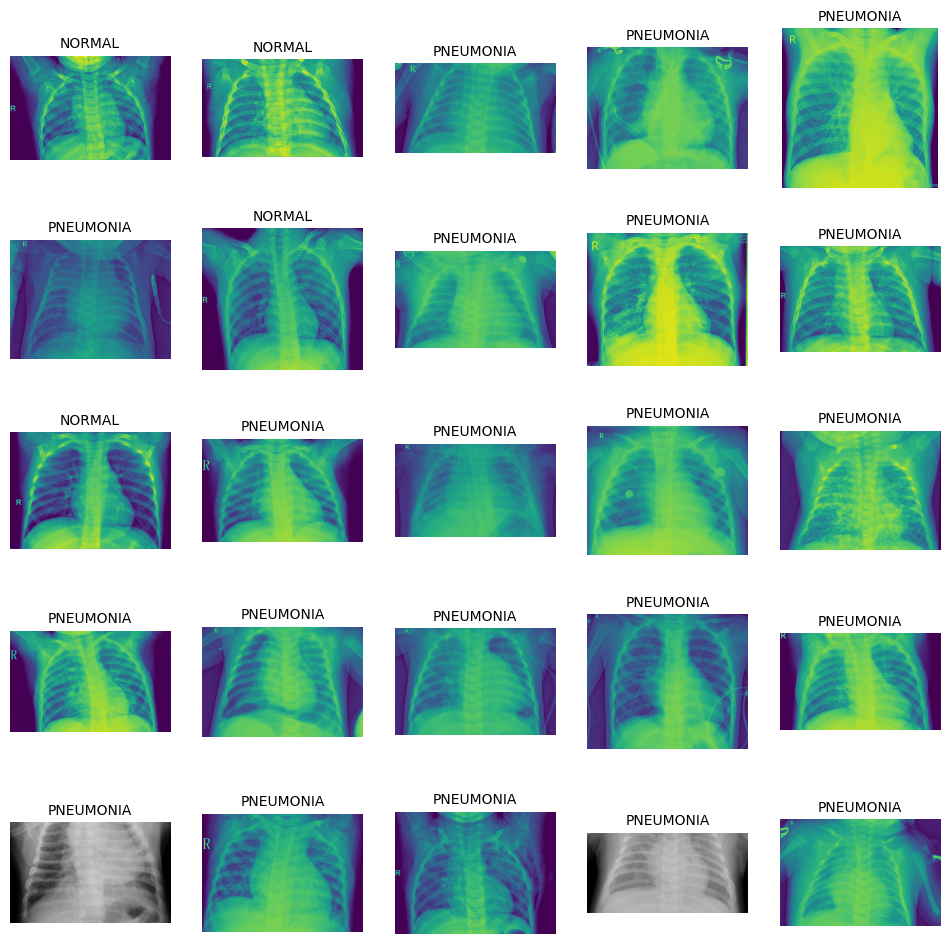

In [ ]:
rows = 5
cols = 5

dataset = pd.concat([train_df, test_df, val_df])

selected_indices = random.sample(range(len(dataset)), rows * cols)

fig, axes = plt.subplots(rows, cols, figsize = (12, 12))
gs = gridspec.GridSpec(rows, cols, wspace = 0.0, hspace = 0.0)

for i, idx in enumerate(selected_indices):
    row = i // cols
    col = i % cols
    img_path = dataset['imgpath'].iloc[idx]
    label = dataset['labels'].iloc[idx]
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(label, fontsize = 10)

plt.show()

## Distribution of Labels

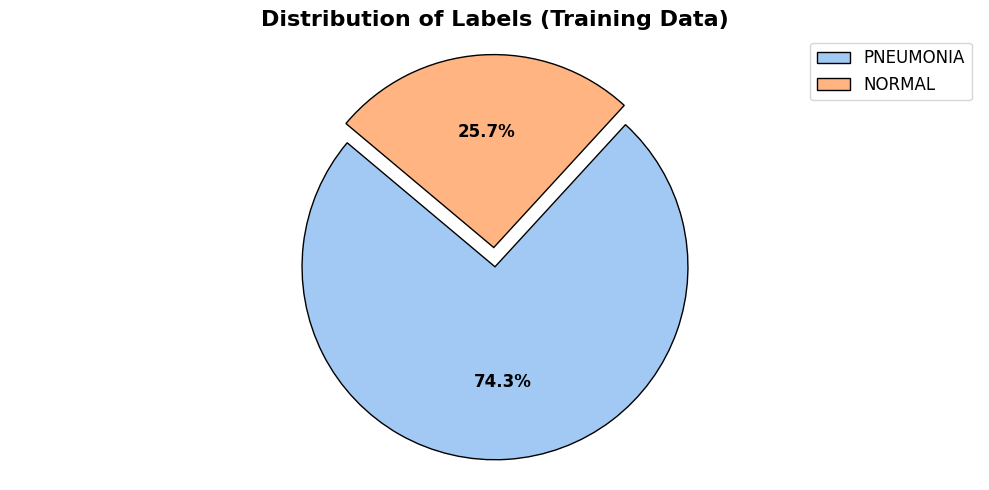

In [ ]:
dataset = train_df

fig, ax = plt.subplots(figsize = (10, 5))

labels = dataset['labels'].value_counts().index
sizes = dataset['labels'].value_counts().values
colors = sns.color_palette('pastel')

wedges, texts, autotexts = ax.pie(sizes, colors = colors,
                                  autopct = '%1.1f%%', startangle = 140,
                                  explode = (0.1, 0), wedgeprops = dict(edgecolor = 'black'))

ax.set_title('Distribution of Labels (Training Data)', fontsize = 16, fontweight = 'bold')
ax.axis('equal')
ax.legend(wedges, labels, loc = "best", fontsize = 12)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## Data Pre-Processing


In [ ]:
%%time

BATCH_SIZE = 16
IMG_SHAPE = (128, 128)
SEED = 0
EPOCHS = 30

traingen = ImageDataGenerator(rescale = 1./255,
                              rotation_range = 10,
                              width_shift_range = 0.02,
                              height_shift_range = 0.02,
                              zoom_range = 0.05,
                              horizontal_flip = True)

testgen = ImageDataGenerator(rescale = 1./255)

train_images = traingen.flow_from_dataframe(train_df, x_col = 'imgpath', y_col = 'labels',
                                            class_mode = 'binary', color_mode = 'rgb',
                                            batch_size = BATCH_SIZE, target_size = IMG_SHAPE,
                                            shuffle = True, seed = SEED)

val_images = testgen.flow_from_dataframe(val_df, x_col = 'imgpath', y_col = 'labels',
                                         class_mode = 'binary', color_mode = 'rgb',
                                         batch_size = BATCH_SIZE, target_size = IMG_SHAPE,
                                         shuffle = False)

test_images = testgen.flow_from_dataframe(test_df, x_col = 'imgpath', y_col = 'labels',
                                          class_mode = 'binary', color_mode = 'rgb',
                                          batch_size = BATCH_SIZE, target_size = IMG_SHAPE,
                                          shuffle = False)

Found 5216 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
CPU times: user 166 ms, sys: 309 ms, total: 475 ms
Wall time: 1.63 s


## Creating and Training the Classifier

### Fine tuning Model

In [ ]:
base_model = VGG16(include_top = False, weights = 'imagenet',
                   input_shape = IMG_SHAPE + (3,), pooling = 'avg')

for layer in base_model.layers[:-10]:
    layer.trainable = False

## Configuring and Compiling Classifier


In [ ]:
model = Sequential([
    Input(shape = IMG_SHAPE + (3,), name = 'input_layer'),
    base_model,

    BatchNormalization(),

    Dense(1024, activation = 'relu', kernel_regularizer = l2(0.001)),
    Dropout(0.4, seed = SEED),

    Dense(512, activation = 'relu', kernel_regularizer = l2(0.001)),
    Dropout(0.4, seed = SEED),

    Dense(1, activation = 'sigmoid', name = 'output_layer')
])

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = BinaryCrossentropy(), metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                      

## Training the Classifier



In [ ]:
set_seed(SEED)

model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')

history = model.fit(train_images, validation_data = val_images,
                    epochs = EPOCHS, callbacks = [model_es, model_rlr])

Epoch 1/30
326/326 [==============================] - 99s 302ms/step - loss: 0.2099 - accuracy: 0.9540 - val_loss: 0.1955 - val_accuracy: 1.0000 - lr: 8.0000e-06
Epoch 2/30
326/326 [==============================] - 97s 298ms/step - loss: 0.1963 - accuracy: 0.9603 - val_loss: 0.2208 - val_accuracy: 1.0000 - lr: 8.0000e-06
Epoch 3/30
326/326 [==============================] - 98s 301ms/step - loss: 0.1924 - accuracy: 0.9611 - val_loss: 0.2211 - val_accuracy: 1.0000 - lr: 1.6000e-06
Epoch 4/30
326/326 [==============================] - 97s 296ms/step - loss: 0.1872 - accuracy: 0.9611 - val_loss: 0.2272 - val_accuracy: 1.0000 - lr: 3.2000e-07


In [ ]:
test_results = model.evaluate(test_images, verbose = 0)

print(f'Test Loss: {test_results[0]:.5f}')
print(f'Test Accuracy: {(test_results[1] * 100):.2f}%')

Test Loss: 0.39835
Test Accuracy: 91.03%


In [ ]:
class_labels = list(train_images.class_indices.keys())

test_classes = test_images.classes
predicted_classes = np.round(model.predict(test_images, verbose = 0))

print(f'Classification Report (Test) --> \n\n' + \
f'{classification_report(test_classes, predicted_classes, target_names = class_labels)}')

Classification Report (Test) --> 

              precision    recall  f1-score   support

      NORMAL       0.93      0.82      0.87       234
   PNEUMONIA       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



## Accuracy and Loss Curve

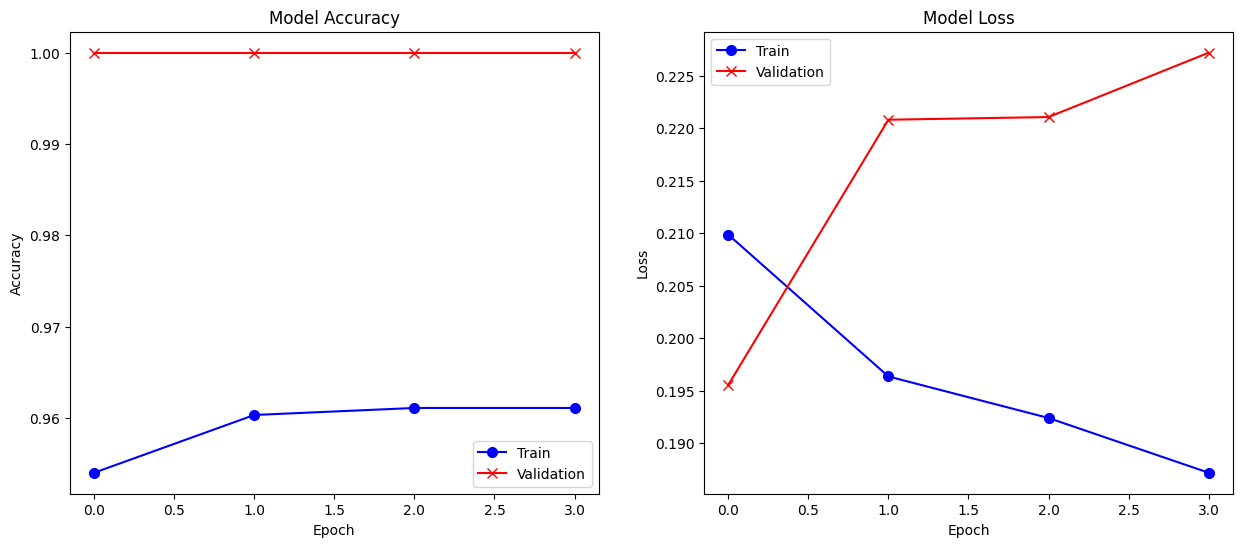

In [ ]:
_, ax = plt.subplots(ncols = 2, figsize = (15, 6))

# accuracy

ax[0].plot(history.history['accuracy'], marker = 'o', color = 'blue', markersize = 7)
ax[0].plot(history.history['val_accuracy'], marker = 'x', color = 'red', markersize = 7)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])

# loss

ax[1].plot(history.history['loss'], marker = 'o', color = 'blue', markersize = 7)
ax[1].plot(history.history['val_loss'], marker = 'x', color = 'red', markersize = 7)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

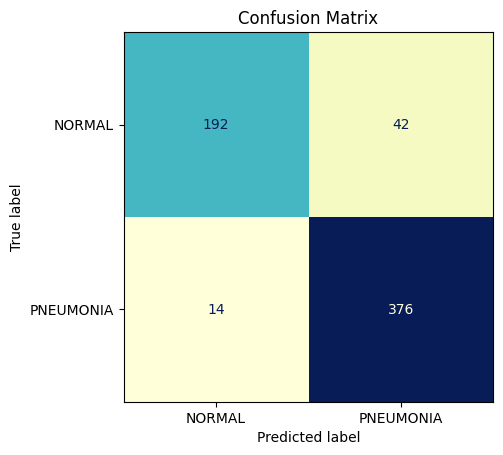

In [ ]:
test_matrix = confusion_matrix(test_classes, predicted_classes)

class_labels = list(test_images.class_indices.keys())

disp_test = ConfusionMatrixDisplay(confusion_matrix = test_matrix, display_labels = class_labels)

plt.figure(figsize = (10, 10))

disp_test.plot(cmap = 'YlGnBu', colorbar = False)
plt.title('Confusion Matrix')

plt.show()

# Brain Tumor Detection

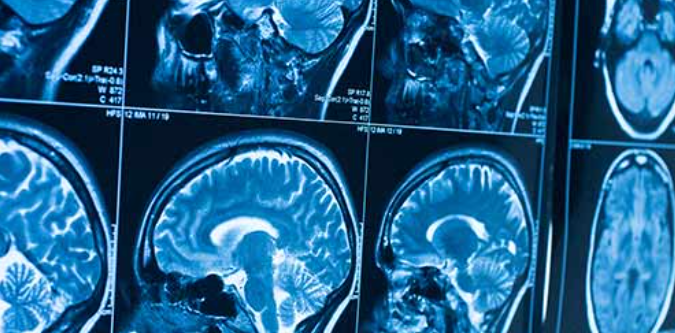

A brain tumor is a growth of cells in the brain or near it. Brain tumors can happen in the brain tissue. Brain tumors also can happen near the brain tissue. Nearby locations include nerves, the pituitary gland, the pineal gland, and the membranes that cover the surface of the brain.

Brain tumors can begin in the brain. These are called primary brain tumors. Sometimes, cancer spreads to the brain from other parts of the body. These tumors are secondary brain tumors, also called metastatic brain tumors.

Many different types of primary brain tumors exist. Some brain tumors aren't cancerous. These are called noncancerous brain tumors or benign brain tumors. Noncancerous brain tumors may grow over time and press on the brain tissue. Other brain tumors are brain cancers, also called malignant brain tumors. Brain cancers may grow quickly. The cancer cells can invade and destroy the brain tissue.

Brain tumors range in size from very small to very large. Some brain tumors are found when they are very small because they cause symptoms that you notice right away. Other brain tumors grow very large before they're found. Some parts of the brain are less active than others. If a brain tumor starts in a part of the brain that's less active, it might not cause symptoms right away. The brain tumor size could become quite large before the tumor is detected.

Brain tumor treatment options depend on the type of brain tumor you have, as well as its size and location. Common treatments include surgery and radiation therapy.

## Symptoms of Brain Tumor
Headaches.
Seizures or convulsions.
Difficulty thinking, speaking or finding words.
Personality or behavior changes.
Weakness, numbness or paralysis in one part or one side of the body.
Loss of balance, dizziness or unsteadiness.
Loss of hearing.
Vision changes.

## Extraction of dataset from zip file


In [ ]:
import zipfile
zip_file_path = "/content/drive/MyDrive/dataset/brain tumor.zip"

# Define the directory to extract the files to
extract_to_directory = "/content/drive/MyDrive/path/to/extracted/files"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [ ]:
!pip install colorama

## Importing the necessary libraries

In [ ]:
import os
import random
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Dataframe

In [ ]:
print('Training:\n')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Training/glioma'))
print(Fore.BLUE + f'glioma: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Training/meningioma'))
print(Fore.BLUE + f'meningioma: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Training/notumor'))
print(Fore.BLUE + f'notumor: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Training/pituitary'))
print(Fore.BLUE + f'pituitary: {len(files)}\n')

print(Fore.WHITE + 'Testing:\n')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Testing/glioma'))
print(Fore.BLUE + f'glioma: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Testing/meningioma'))
print(Fore.BLUE + f'meningioma: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Testing/notumor'))
print(Fore.BLUE + f'notumor: {len(files)}')
path, dirs, files = next(os.walk('/content/drive/MyDrive/path/to/extracted/files/Testing/pituitary'))
print(Fore.BLUE + f'pituitary: {len(files)}\n')

Training:

glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457

Testing:

glioma: 300
meningioma: 306
notumor: 405
pituitary: 300



##  Data for training and testing

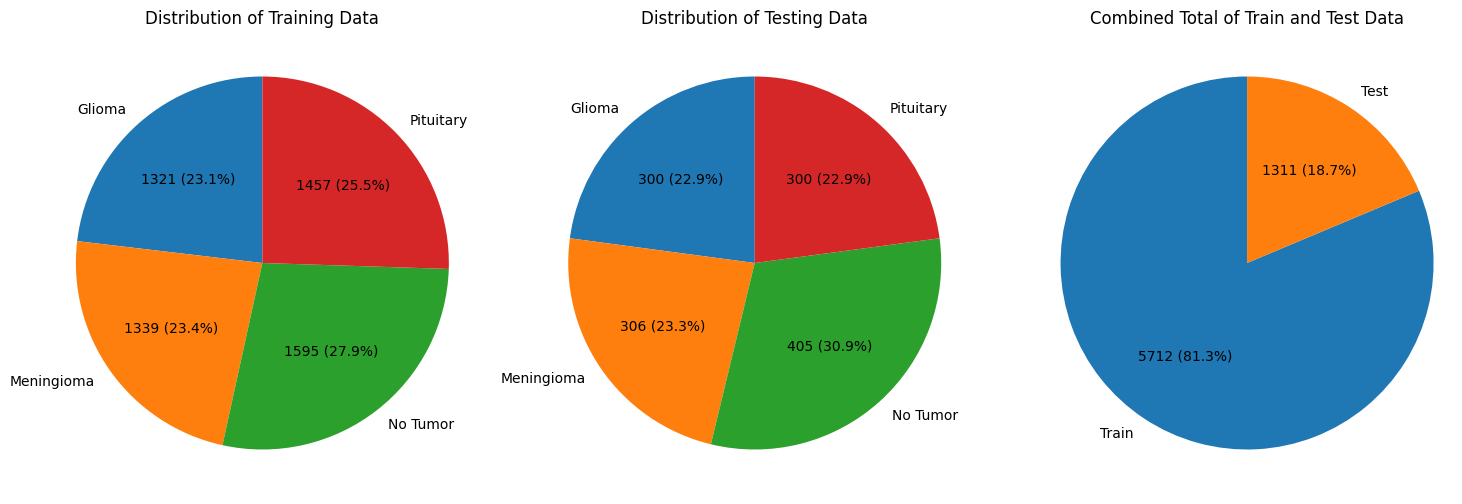

In [ ]:

train_counts = [1321, 1339, 1595, 1457]
test_counts = [300, 306, 405, 300]
labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

total_train = sum(train_counts)
total_test = sum(test_counts)
total_labels = ['Train', 'Test']
total_counts = [total_train, total_test]

# Custom function for autopct to ensure accurate numbers
def custom_autopct(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

def plot_pie_chart(data, labels, title, ax):
    ax.pie(data, labels=labels, autopct=lambda pct: custom_autopct(pct, data), startangle=90)
    ax.axis('equal')
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_pie_chart(train_counts, labels, "Distribution of Training Data", axs[0])
plot_pie_chart(test_counts, labels, "Distribution of Testing Data", axs[1])
plot_pie_chart(total_counts, total_labels, "Combined Total of Train and Test Data", axs[2])

plt.show()

## Data preprocessing and preparing

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dataset = image_dataset_from_directory('/content/drive/MyDrive/path/to/extracted/files/Training',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.15,
                                             subset='training',
                                             label_mode = 'categorical',
                                             seed=42)

validation_dataset = image_dataset_from_directory('/content/drive/MyDrive/path/to/extracted/files/Training',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.15,
                                             subset='validation',
                                             label_mode = 'categorical',
                                             seed=42)

test_dataset = image_dataset_from_directory('/content/drive/MyDrive/path/to/extracted/files/Testing',
                                             shuffle=False,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode = 'categorical',
                                            )
# prefetch the train_dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

Found 5712 files belonging to 4 classes.
Using 4856 files for training.
Found 5712 files belonging to 4 classes.
Using 856 files for validation.
Found 1311 files belonging to 4 classes.


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

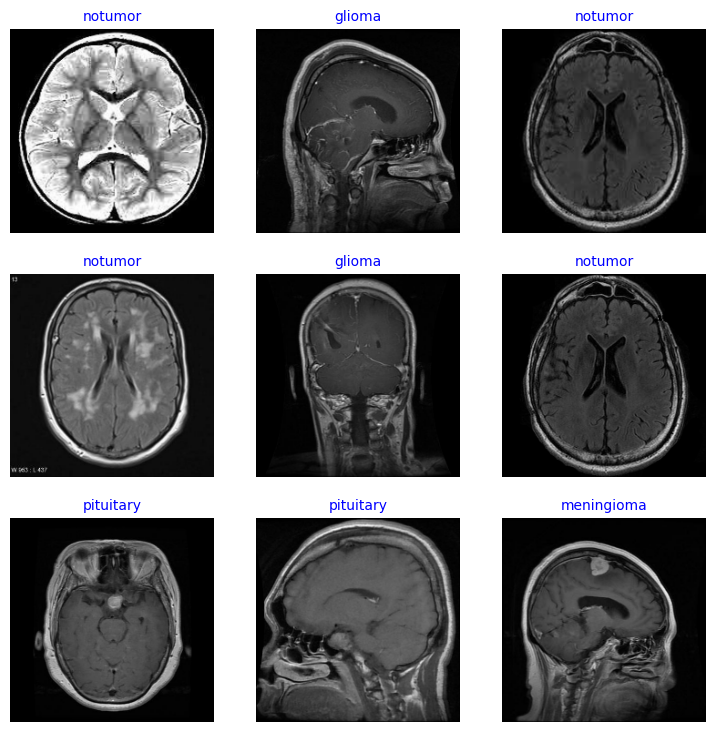

In [ ]:
class_names = test_dataset.class_names
plt.figure(figsize=(9, 9))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])] , c = 'blue' , size = 10)
    plt.axis("off")

In [ ]:
from tensorflow.keras.optimizers import legacy

IMG_SHAPE = IMG_SIZE + (3,)
LOSS = keras.losses.CategoricalCrossentropy()
OPTIMIZER = legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
SEED = 42

## Callbacks for the models

In [ ]:

def get_callbacks (model_name):
  callbacks = []
  checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath= f'model.{model_name}.h5', monitor = 'val_loss', verbose = 1 ,
                                                    mode = 'min', save_best_only=True, save_freq='epoch')
  callbacks.append(checkpoint)
  rlr = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss', factor=0.2, patience=5, mode='auto', min_lr=0.0)
  callbacks.append(rlr)
  earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7)
  callbacks.append(earlystop)

  return callbacks

##  Ploting resultes

In [ ]:
def plot():
   pd.DataFrame(history.history)[['categorical_accuracy','val_categorical_accuracy','loss','val_loss']].plot( figsize=(7, 5), xlim=[0, 9], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
   plt.show()

# for make dataframe for all model
model_name= ['My_model','DenseNet121','VGG16','ResNet50V2','MobileNetV2','EfficientNetV2S','Xception']
CategoricalAccuracy= []
losses= []

## Model

In [ ]:
model = Sequential([
    tfl.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(64, (3,3), activation='relu'),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(128, (3,3), activation='relu'),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(256, (3,3), activation='relu'),
    tfl.MaxPooling2D(2,2),
    tfl.Flatten(),
    tfl.Dense(512, activation='relu'),
    tfl.Dropout(0.5),
    tfl.Dense(4, activation='softmax')
])

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('my_model')
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 4.5464 - categorical_accuracy: 0.7053
Epoch 1: val_loss improved from inf to 0.45117, saving model to model.my_model.h5
152/152 [==============================] - 733s 5s/step - loss: 4.5464 - categorical_accuracy: 0.7053 - val_loss: 0.4512 - val_categorical_accuracy: 0.8540 - lr: 0.0010
Epoch 2/10
151/152 [============================>.] - ETA: 0s - loss: 0.4050 - categorical_accuracy: 0.8589
Epoch 2: val_loss improved from 0.45117 to 0.32590, saving model to model.my_model.h5
152/152 [==============================] - 24s 150ms/step - loss: 0.4049 - categorical_accuracy: 0.8591 - val_loss: 0.3259 - val_categorical_accuracy: 0.8820 - lr: 0.0010
Epoch 3/10
151/152 [============================>.] - ETA: 0s - loss: 0.2992 - categorical_accuracy: 0.8947
Epoch 3: val_loss improved from 0.32590 to 0.29426, saving model to model.my_model.h5
152/152 [==============================] - 22s 138ms/step - loss: 0.2981 - categor

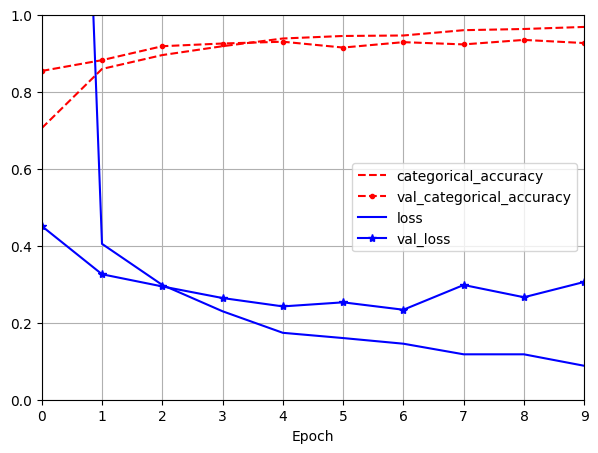

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 5s 131ms/step - loss: 0.2897 - categorical_accuracy: 0.9260


## DenseNet121

In [ ]:
# Apply preprocessing to datasets

from tensorflow.keras.applications.densenet import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_densenet = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_densenet = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_densenet = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)

from tensorflow.keras.applications import DenseNet121

dense_model = DenseNet121(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
dense_model.trainable = False

x = dense_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=dense_model.input, outputs=predictions)

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy() , keras.metrics.Recall()])

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
callbacks = get_callbacks('DenseNet121')

history = model.fit(
    train_dataset_densenet,
    epochs=10,
    validation_data=validation_dataset_densenet,
    callbacks=callbacks
)

Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.5852 - categorical_accuracy: 0.8171 - recall: 0.7912
Epoch 1: val_loss improved from inf to 0.29644, saving model to model.DenseNet121.h5
152/152 [==============================] - 44s 215ms/step - loss: 0.5852 - categorical_accuracy: 0.8171 - recall: 0.7912 - val_loss: 0.2964 - val_categorical_accuracy: 0.8890 - val_recall: 0.8727 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2437 - categorical_accuracy: 0.9082 - recall: 0.8983
Epoch 2: val_loss improved from 0.29644 to 0.22227, saving model to model.DenseNet121.h5
152/152 [==============================] - 31s 197ms/step - loss: 0.2437 - categorical_accuracy: 0.9082 - recall: 0.8983 - val_loss: 0.2223 - val_categorical_accuracy: 0.9159 - val_recall: 0.9019 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.1931 - categorical_accuracy: 0.9298 - recall: 0.9242
Epoch 3: val_loss improved from 0

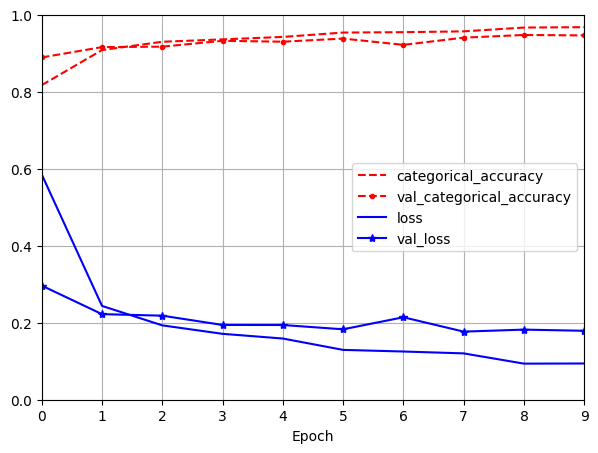

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy, recall = model.evaluate(test_dataset_densenet)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 11s 275ms/step - loss: 0.1889 - categorical_accuracy: 0.9405 - recall: 0.9359


## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_vgg16 = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_vgg16 = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_vgg16 = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)


from tensorflow.keras.applications import VGG16

VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
VGG16_model.trainable = False

x = VGG16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=VGG16_model.input, outputs=predictions)
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('VGG16')
history = model.fit(
    train_dataset_vgg16,
    epochs=10,
    validation_data=validation_dataset_vgg16,
    callbacks=callbacks
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.8157 - categorical_accuracy: 0.8126
Epoch 1: val_loss improved from inf to 0.26456, saving model to model.VGG16.h5
152/152 [==============================] - 47s 253ms/step - loss: 0.8157 - categorical_accuracy: 0.8126 - val_loss: 0.2646 - val_categorical_accuracy: 0.8949 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2375 - categorical_accuracy: 0.9133
Epoch 2: val_loss improved from 0.26456 to 0.22065, saving model to model.VGG16.h5
152/152 [==============================] - 37s 240ms/step - loss: 0.2375 - categorical_accuracy: 0.9133 - val_loss: 0.2207 - val_categorical_accuracy: 0.9171 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.1749 - categorical_accuracy: 0.9362
Epoch 3: val_loss improved from 0.22065 to 0.21395, saving model to model.VGG16.h5
152/152 [===============

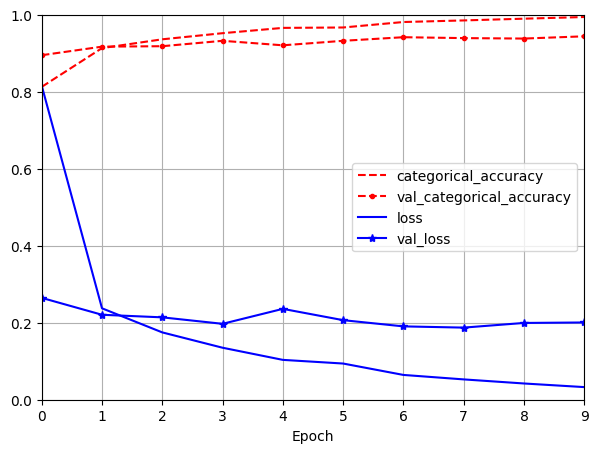

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset_vgg16)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)


41/41 [==============================] - 17s 407ms/step - loss: 0.1714 - categorical_accuracy: 0.9550


## ResNet50V2

In [ ]:

from tensorflow.keras.applications.resnet_v2 import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_resnet = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_resnet = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_resnet = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)


from tensorflow.keras.applications import ResNet50V2
ResNet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
ResNet_model.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=ResNet_model.input, outputs=predictions)
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('ResNet50V2')
history = model.fit(
    train_dataset_resnet,
    epochs=10,
    validation_data=validation_dataset_resnet,
    callbacks=callbacks
)

94668760/94668760 [==============================] - 0s 0us/step
Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.6851 - categorical_accuracy: 0.8190
Epoch 1: val_loss improved from inf to 0.30426, saving model to model.ResNet50V2.h5
152/152 [==============================] - 36s 186ms/step - loss: 0.6851 - categorical_accuracy: 0.8190 - val_loss: 0.3043 - val_categorical_accuracy: 0.8984 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2215 - categorical_accuracy: 0.9224
Epoch 2: val_loss improved from 0.30426 to 0.24163, saving model to model.ResNet50V2.h5
152/152 [==============================] - 28s 176ms/step - loss: 0.2215 - categorical_accuracy: 0.9224 - val_loss: 0.2416 - val_categorical_accuracy: 0.9124 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.1510 - categorical_accuracy: 0.9469
Epoch 3: val_loss improved from 0.24163 to 0.22209, saving model to model.ResNet50V2.h5
152/152 [

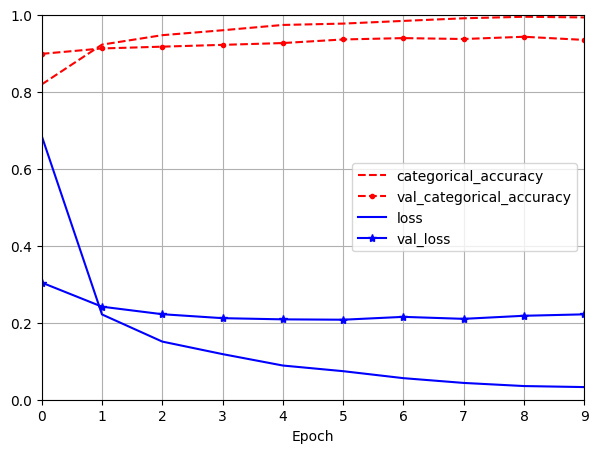

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset_resnet)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 8s 199ms/step - loss: 0.1933 - categorical_accuracy: 0.9481


## MobileNetV2

In [ ]:

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_mobilenet = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_mobilenet = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_mobilenet = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)


from tensorflow.keras.applications import MobileNetV2
MobileNet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
MobileNet_model.trainable = False

x = MobileNet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=MobileNet_model.input, outputs=predictions)
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('MobileNetV2')
history = model.fit(
    train_dataset_mobilenet,
    epochs=10,
    validation_data=validation_dataset_mobilenet,
    callbacks=callbacks
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.4843 - categorical_accuracy: 0.8460
Epoch 1: val_loss improved from inf to 0.22625, saving model to model.MobileNetV2.h5
152/152 [==============================] - 28s 155ms/step - loss: 0.4843 - categorical_accuracy: 0.8460 - val_loss: 0.2262 - val_categorical_accuracy: 0.9171 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2093 - categorical_accuracy: 0.9197
Epoch 2: val_loss improved from 0.22625 to 0.21091, saving model to model.MobileNetV2.h5
152/152 [==============================] - 23s 145ms/step - loss: 0.2093 - categorical_accuracy: 0.9197 - val_loss: 0.2109 - val_categorical_accuracy: 0.9252 - lr: 0.0010
Epoch 3/10
151/152 [============================>.] - ETA: 0s - loss: 0.1412 - categorical_accuracy: 0.9458
Epoch 3: val_loss did not improve from 0.21091
152/152 [==============================] - 22s 140

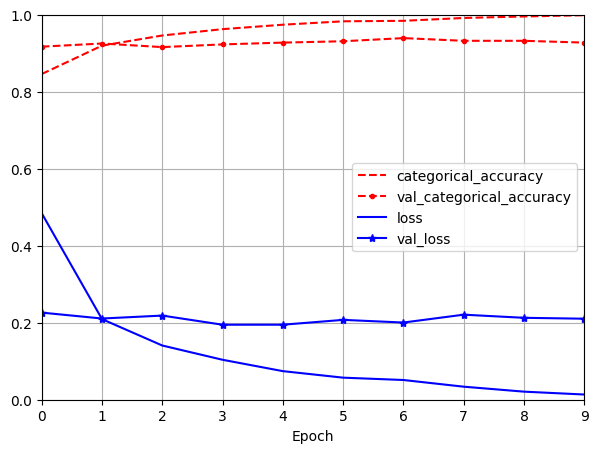

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset_mobilenet)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 5s 131ms/step - loss: 0.1954 - categorical_accuracy: 0.9397


## EfficientNetV2S

In [ ]:

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_efficientnet = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_efficientnet = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_efficientnet = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)


from tensorflow.keras.applications import EfficientNetV2S
EfficientNet_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
EfficientNet_model.trainable = False

x = EfficientNet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=EfficientNet_model.input, outputs=predictions)
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('EfficientNetV2S')
history = model.fit(
    train_dataset_efficientnet,
    epochs=10,
    validation_data=validation_dataset_efficientnet,
    callbacks=callbacks
)

82420632/82420632 [==============================] - 0s 0us/step
Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.4386 - categorical_accuracy: 0.8254
Epoch 1: val_loss improved from inf to 0.28858, saving model to model.EfficientNetV2S.h5
152/152 [==============================] - 50s 220ms/step - loss: 0.4386 - categorical_accuracy: 0.8254 - val_loss: 0.2886 - val_categorical_accuracy: 0.8890 - lr: 2.0000e-04
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2720 - categorical_accuracy: 0.8991
Epoch 2: val_loss improved from 0.28858 to 0.24698, saving model to model.EfficientNetV2S.h5
152/152 [==============================] - 28s 177ms/step - loss: 0.2720 - categorical_accuracy: 0.8991 - val_loss: 0.2470 - val_categorical_accuracy: 0.8960 - lr: 2.0000e-04
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.2289 - categorical_accuracy: 0.9147
Epoch 3: val_loss improved from 0.24698 to 0.22140, saving model to model.Effic

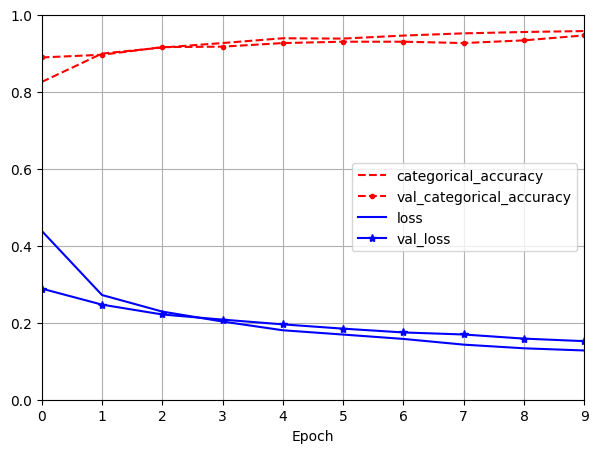

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset_efficientnet)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 7s 176ms/step - loss: 0.1656 - categorical_accuracy: 0.9504


## Xception

In [ ]:

from tensorflow.keras.applications.xception import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset_xception = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
validation_dataset_xception = validation_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
test_dataset_xception = test_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)


from tensorflow.keras.applications import Xception
Xception_model = Xception(weights='imagenet', include_top=False, input_shape= IMG_SHAPE , classes = 4)
Xception_model.trainable = False

x = Xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=Xception_model.input, outputs=predictions)
model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[keras.metrics.CategoricalAccuracy()])

# fitting
callbacks = get_callbacks('Xception')
history = model.fit(
    train_dataset_xception,
    epochs=10,
    validation_data=validation_dataset_xception,
    callbacks=callbacks
)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.4430 - categorical_accuracy: 0.8309
Epoch 1: val_loss improved from inf to 0.32687, saving model to model.Xception.h5
152/152 [==============================] - 40s 216ms/step - loss: 0.4430 - categorical_accuracy: 0.8309 - val_loss: 0.3269 - val_categorical_accuracy: 0.8855 - lr: 2.0000e-04
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.2561 - categorical_accuracy: 0.9075
Epoch 2: val_loss improved from 0.32687 to 0.26551, saving model to model.Xception.h5
152/152 [==============================] - 30s 191ms/step - loss: 0.2561 - categorical_accuracy: 0.9075 - val_loss: 0.2655 - val_categorical_accuracy: 0.9077 - lr: 2.0000e-04
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.2178 - categorical_accuracy: 0.9222
Epoch 3: val_loss did not improve from 0.26551
152/152 [==============================] - 29s

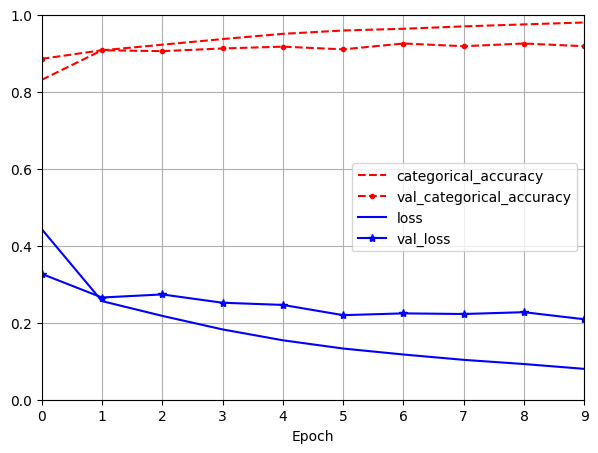

In [ ]:
plot()

In [ ]:
loss, categorical_accuracy = model.evaluate(test_dataset_xception)
CategoricalAccuracy.append(categorical_accuracy)
losses.append(loss)

41/41 [==============================] - 10s 246ms/step - loss: 0.2030 - categorical_accuracy: 0.9352


In [ ]:
models_df = pd.DataFrame({"model-name":model_name, "Categorical_accuracy": CategoricalAccuracy , 'Loss': losses})
models_df = models_df.set_index('model-name')
models_df.sort_values("Loss", ascending = True)

,Categorical_accuracy,Loss
model-name,,
EfficientNetV2S,0.950420,0.165611
VGG16,0.954996,0.171368
DenseNet121,0.940503,0.188934
ResNet50V2,0.948131,0.193345
MobileNetV2,0.939741,0.195429
Xception,0.935164,0.202982
My_model,0.926011,0.289739


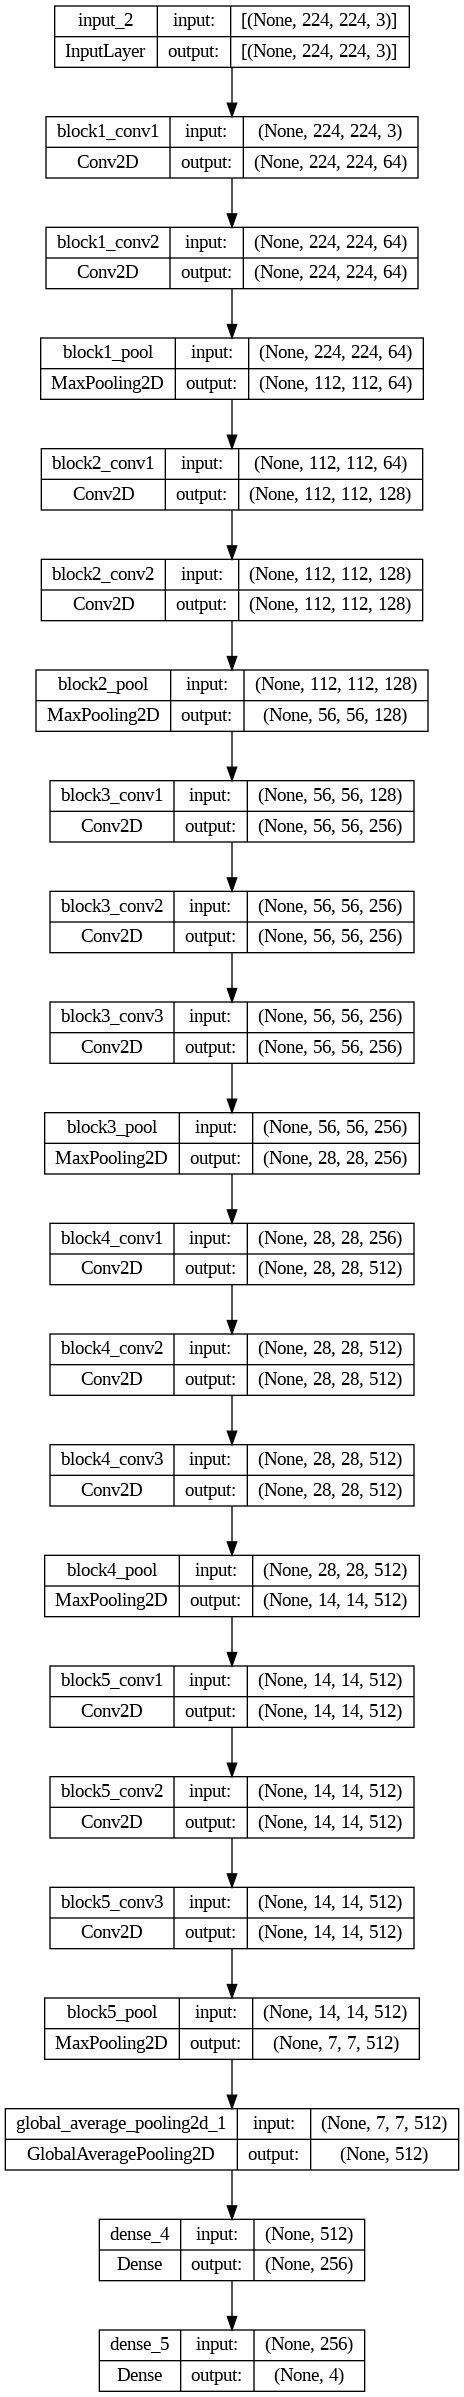

In [ ]:
best_model = keras.models.load_model('model.VGG16.h5')
tf.keras.utils.plot_model(best_model, show_shapes=True)

In [ ]:
for layer in vgg_tuning.layers[:17]:
    layer.trainable = False
# Set the last 5 layers to trainable
for layer in vgg_tuning.layers[17:]:
    layer.trainable = True

callbacks = get_callbacks('vgg_tuning')
history = vgg_tuning.fit(
    train_dataset_vgg16,
    epochs=10,
    validation_data=validation_dataset_vgg16,
    callbacks=callbacks
)

In [ ]:
loss, categorical_accuracy = vgg_tuning.evaluate(test_dataset_vgg16)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = vgg_tuning.predict(test_dataset_vgg16)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:
print("\nClassification Report:\n")
print(Fore.BLUE + classification_report(y_true, y_pred, target_names = class_names, digits= 4))